# Pre-Pandas Clock_in version

In [ ]:
# Pre-pandas
import tkinter as tk
import time
import csv
import pandas as pd
import math

a = 0

#   record file to access the income and pay rate of the previous day (csv)
file = pd.read_csv('/Users/minhpham/Desktop/Work/Python/clock_in/record.csv')
df = pd.DataFrame(file).values
asset = float((df.item(-1)))
pay_rate = float((df.item(-2)))

root = tk.Tk()


def clockin():

    global clock_in, a, asset, pay_rate, label2, label4, label5, label6, label7, label8

    password = "Epsilon5"

    if a % 2 == 0:
        mdp = entry.get()
        clock_in = time.time()
        label2 = tk.Label(text="")
        label2.pack()
        if str(mdp) == str(password):
            label4 = tk.Label(text="You clock in at " + time.ctime())
            label4.pack()
            label5 = tk.Label(text="Your total asset value is $" + str(round(asset, 2))
                                    + ", your pay rate today is $" + str(round(pay_rate, 2)))
            label5.pack()

            #   log book for recording hours and pay rate (easier for human to read)
            f = open("/Users/minhpham/Desktop/Work/Python/clock_in/book_keeping.txt", "a")
            f.write("\n\n" + time.ctime())
            f.write("\nStart time:    " + time.ctime())

            f.close()

            a += 1

    else:
        mdp = entry.get()
        if str(mdp) == str(password):
            label6 = tk.Label(text="You clock out at " + time.ctime())
            label6.pack()

            clock_out = time.time()
            time_elapse = clock_out - clock_in
            hours = math.floor(time_elapse / 3600)
            minutes = (time_elapse / 60) - (hours * 60)

            wage = pay_rate * (time_elapse / 3600)

            label7 = tk.Label(text="You've worked for " + str(round(hours)) + " hours and " + str(round(minutes)) +
                                   " minutes and earned $" + str(round(wage, 2)))
            label7.pack()

            pay_rate = pay_rate * math.pow(1.0024, ((time_elapse / 3600) / 8))

            label8 = tk.Label(text="Your total asset value is $" + str(round(asset, 2))
                            + ", your pay rate today is $" + str(round(pay_rate, 2)))
            label8.pack()

            asset = asset + wage

            #   entry in log book

            f = open("/Users/minhpham/Desktop/Work/Python/clock_in/book_keeping.txt", "a")

            f.write("\nEnd time:    " + time.ctime())
            f.write("\nTotal work time:    " + str(round(hours)) + " hours " + str(round(minutes))
                    + " minutes")
            f.write("\nMoney earned:    $" + str(round(wage, 2)))
            f.write("\nPay rate:    $" + str(pay_rate))
            f.write("\nOwned:    $" + str(round(asset, 2)))

            f.close()

            #   entry in record book
            with open('/Users/minhpham/Desktop/Work/Python/clock_in/record.csv', "a") as file:
                writer = csv.writer(file)
                writer.writerow({float(pay_rate)})
                writer.writerow({asset})
                file.close()

            a += 1


label1 = tk.Label(text="Please clock in")
entry = tk.Entry()
button = tk.Button(root, text="Enter", command=clockin)


def delete():
    label2.pack_forget()
    label4.pack_forget()
    label5.pack_forget()
    label6.pack_forget()
    label7.pack_forget()
    label8.pack_forget()


label1.pack()
entry.pack()
button.pack()
button_delete = tk.Button(root, text="Delete", command=delete)
button_delete.pack()
root.mainloop()

print("Program stopped")


<br>

# Pandas clock_in

In [86]:
'''import pandas as pd

# Initial Data Frame
df = pd.DataFrame([], 
                  columns = ['start_time', 'end_time', 'work_time', 'pay_rate', 'money_made', 'asset'])


df.name = "Clock in DataFrame"
df = df.set_index('start_time')

df.loc[0] = [0, 0, 11.137044584764622, 0, 5673.25]  #['end_time', 'work_time', 'pay_rate', 'money_made', 'asset']

df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"
df.to_csv(df_name)'''

<br>Full clock_in

In [1]:
# Remember to redirect to the right file

import tkinter as tk
import time
import pandas as pd
import math
import total_time
import manual_clock_in

root = tk.Tk()

a = 0


def save(start, end):
    # After first DataFrame has been created

    df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"
    df = pd.read_csv(df_name)

    df = df.set_index('start_time')

    start_time = pd.to_datetime(time.ctime(start))
    end_time = pd.to_datetime(time.ctime(end))
    work_time = (end - start) / 3600
    pay_rate = df.iloc[-1]['pay_rate'] * math.pow(1.0024, (work_time / 8))
    money_made = pay_rate * work_time
    asset = df.iloc[-1]['asset'] + money_made

    # pandas .csv save
    df.loc[start_time] = [end_time, work_time, pay_rate, money_made, asset]

    df.to_csv(df_name)

    # .txt file save

    txt_name = "/Users/minhpham/Desktop/Work/Python/clock_in/book_keeping.txt"

    with open(txt_name, "a") as f:
        f.write(f"\n\n{time.ctime(start)}")
        f.write(f"\nStart time:    {time.ctime(start)}")
        f.write(f"\nEnd time:    {time.ctime(end)}")

        # work_time in hours
        hours = int(work_time)  # hours
        minutes = int((work_time - int(work_time)) * 60)  # minutes

        f.write(f"\nTotal work time:    {round(hours)} hours {round(minutes)} minutes")
        f.write(f"\nMoney earned:    ${round(money_made, 2)}")
        f.write(f"\nPay rate:    ${pay_rate}")
        f.write(f"\nOwned:    ${round(asset, 2)}")

        # Return information for tkinter
        # save tuple[ 0: hours, 1: minutes, 2: money_made, 3: asset, 4: pay_rate ]

    return hours, minutes, money_made, asset, pay_rate


def clockin():
    global a, start, end, label2, label4, label5, label6, label7, label8

    df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"
    df = pd.read_csv(df_name)

    password = "Epsilon5"

    if a == 0:

        mdp = entry.get()
        start = time.time()
        label2 = tk.Label(text="")
        label2.pack()
        if str(mdp) == str(password):
            label4 = tk.Label(text = f"You clock in at {time.ctime()}")
            label4.pack()
            label5 = tk.Label(text=f"Your total asset value is ${round(df.iloc[-1]['asset'], 2)}"
                                   f", your pay rate today is ${round(df.iloc[-1]['pay_rate'], 2)}")
            label5.pack()

            a += 1

    elif (a % 2 == 0) & (a > 0):

        label2.pack_forget()
        label4.pack_forget()
        label5.pack_forget()
        label6.pack_forget()  # Turn off clock out
        label7.pack_forget()
        label8.pack_forget()

        mdp = entry.get()
        start = time.time()
        label2 = tk.Label(text="")
        label2.pack()
        if str(mdp) == str(password):
            label4 = tk.Label(text=f"You clock in at {time.ctime()}")
            label4.pack()
            label5 = tk.Label(text=f"Your total asset value is ${round(df.iloc[-1]['asset'], 2)}"
                                   f", your pay rate today is ${round(df.iloc[-1]['pay_rate'], 2)}")
            label5.pack()

            a += 1

    elif a % 2 == 1:

        mdp = entry.get()
        if str(mdp) == str(password):
            label6 = tk.Label(text=f"You clock out at {time.ctime()}")
            label6.pack()

            end = time.time()

            # file entry
            save_tuple = save(start, end)

            label7 = tk.Label(text=f"You've worked for {save_tuple[0]} hours and {round(save_tuple[1])}"
                                   f" minutes and earned $"
                                   f'{round(save_tuple[2], 2)}')
            label7.pack()

            label8 = tk.Label(text=f"Your total asset value is ${round(save_tuple[3], 2)}"
                                   f", your pay rate today is ${round(save_tuple[4], 2)}")
            label8.pack()

            a += 1


label1 = tk.Label(text="Please clock in")
entry = tk.Entry()
button = tk.Button(root, text="Enter", command=clockin)

label1.pack()
entry.pack()
button.pack()
root.mainloop()

print("GUI Program stopped")

time.sleep(3)

print(f"\nYou worked for {round(total_time.total_work_time, 1)} hours today and made "
      f"${round(total_time.money_made,2)}")

if input("Do you want to clock in manually  ").lower() == "yes":
    manual_clock_in.manual(input("Input Start Time   # 2020-01-01 00:00:00   (year, month, day) (hour, minutes, "
                                 "seconds)  "),
                           input("Input End Time   # 2020-01-01 00:00:00   (year, month, day) (hour, minutes, "
                                 "seconds)  "))
else:
    pass


Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #2.
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #3.


GUI Program stopped

You worked for 0.0 hours today and made $0.0
Do you want to clock in manually  no


<br>Manual Input

In [ ]:
# Function to manually input
import pandas as pd
import math
import time


def manual(start_time, end_time):

    work_time = (pd.to_datetime(end_time).timestamp() - pd.to_datetime(start_time).timestamp()) / 3600

    df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"

    df = pd.read_csv(df_name)
    df = df.set_index('start_time')
    pay_rate = df.iloc[-1]['pay_rate'] * math.pow(1.0024, (work_time / 8))
    money_made = pay_rate * work_time
    asset = df.iloc[-1]['asset'] + money_made

    # pandas .csv save
    df.loc[start_time] = [end_time, work_time, pay_rate, money_made, asset]

    time.sleep(2)

    df.to_csv(df_name)

    start_time = time.ctime(pd.to_datetime(start_time).timestamp() + 3600 * 7)
    end_time = time.ctime(pd.to_datetime(end_time).timestamp() + 3600 * 7)

    txt_name = "/Users/minhpham/Desktop/Work/Python/clock_in/book_keeping.txt"

    with open(txt_name, "a") as f:
        f.write(f"\n\n{start_time}")
        f.write(f"\nStart time:    {start_time}")
        f.write(f"\nEnd time:    {end_time}")

        # work_time in hours
        hours = int(work_time)  # hours
        minutes = int((work_time - int(work_time)) * 60)  # minutes

        f.write(f"\nTotal work time:    {round(hours)} hours {round(minutes)} minutes")
        f.write(f"\nMoney earned:    ${round(money_made, 2)}")
        f.write(f"\nPay rate:    ${pay_rate}")
        f.write(f"\nOwned:    ${round(asset, 2)}")


<br>Data Summary

In [2]:
import datetime
import pandas as pd

# Open file and prepare data
df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"

df = pd.read_csv(df_name)

df = df.set_index('start_time')

df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# Sorting Data
start_date = datetime.date(2020, 7, 24)   # Start date (year, month, day)

year = datetime.datetime.now().year
month = datetime.datetime.now().month
day = datetime.datetime.now().day

end_date = datetime.date(year, month, day)  # End date (year, month, day)

delta = datetime.timedelta(days=1)

# Separate DataFrame for processed info
df2 = pd.DataFrame([], columns = ['Date', 'Work Time','Money Made'])
df2 = df2.set_index('Date')

while start_date <= end_date:
    
    # Adding up all the work time each day
    work_time = df.loc[start_date:(start_date+delta)]['work_time'].sum()
    
    # Adding up the money made each day
    money = df.loc[start_date:(start_date+delta)]['money_made'].sum()
    
    df2.loc[start_date] = [work_time, money]
    
    start_date += delta
 
# Sample processed DataFrame
print(df2)

            Work Time  Money Made
Date                             
2020-07-24   6.622562   73.868343
2020-07-25  10.251656  114.678965
2020-07-26   6.454931   72.285252
2020-07-27   9.617197  108.055100
2020-07-28   3.595653   40.439252


In [6]:
df2

,Work Time,Money Made
Date,,
2020-07-24,6.622562,73.868343
2020-07-25,10.251656,114.678965
2020-07-26,0.000000,0.000000


<br>Plotting the data in the DataFrame using matplotlib

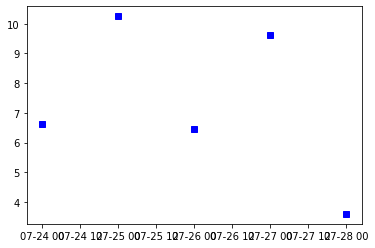

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters  # Not needed

x = df2.index
y1 = df2['Work Time']

plt.plot(x, y1, "bs")  #Plot 2 element on the same plot by restating 'x' variable with respective 'y'
plt.show()

<br>Daily work_time and money_made module

In [9]:
import datetime
import pandas as pd
import time

# Open file and prepare data

df_name = "/Users/minhpham/Desktop/Work/Python/clock_in/clock_in_df.csv"

df = pd.read_csv(df_name)

df = df.set_index('start_time')

df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# Sorting Data
start_date = datetime.date(2020, 6, 8)  # Start date (year, month, day)

year = datetime.datetime.now().year
month = datetime.datetime.now().month
day = datetime.datetime.now().day

end_date = datetime.date(year, month, day)  # End date (year, month, day)

delta = datetime.timedelta(days=1)

# Separate DataFrame for processed info
df2 = pd.DataFrame([], columns=['Date', 'Work Time', 'Money Made'])
df2 = df2.set_index('Date')

while start_date <= end_date:
    # Adding up all the work time each day
    work_time = df.loc[start_date:(start_date + delta)]['work_time'].sum()

    # Adding up the money made each day
    money = df.loc[start_date:(start_date + delta)]['money_made'].sum()

    df2.loc[start_date] = [work_time, money]

    start_date += delta

# Sample processed DataFrame
total_work_time = df2["Work Time"].iloc[-1]
money_made = df2["Money Made"].iloc[-1]   